## Importando bibliotecas

In [2]:
#importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objs as go

from scipy.stats import norm, t

import vectorbt as vbt
from datetime import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

## Verificando estrutura do data frame

In [5]:
carteira_teorica = 'ibov'
#url = '/datasets/basedados/0_projetos/result/db_ct_ibov.csv'
url = f'../result/db_matriz_preco_ct_b3_{carteira_teorica}.csv'

In [6]:
df = pd.read_csv(url, index_col=0)

In [7]:
#verificando estrutura da tabela (linhas x colunas)
df.shape

(5680, 76)

In [8]:
#verificando nome das colunas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa', 'DATE_UPDATE', '

In [9]:
#excluindo colunas
df.drop(['DATE_UPDATE', 'CARTEIRA_TEORICA'], axis=1, inplace=True)

In [10]:
#confirmando as colunas excluidas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa'],
      dtype='ob

In [11]:
#verificando tipo do index
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-08-01',
       '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08'],
      dtype='object', name='date', length=5680)

In [12]:
#convertendo index para data
df.index = pd.to_datetime(df.index)

In [13]:
#confirmando tipo do index
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08'],
              dtype='datetime64[ns]', name='date', length=5680, freq=None)

In [14]:
df

,alpa4.sa,abev3.sa,amer3.sa,b3sa3.sa,bpan4.sa,bbse3.sa,brml3.sa,bbdc3.sa,bbdc4.sa,brap4.sa,...,taee11.sa,vivt3.sa,tims3.sa,tots3.sa,ugpa3.sa,usim5.sa,vale3.sa,viia3.sa,wege3.sa,yduq3.sa
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.196446,NaN,1.517180,...,NaN,7.796522,NaN,NaN,NaN,1.582737,1.795995,0.996683,0.124200,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109432,NaN,1.408810,...,NaN,7.585367,NaN,NaN,NaN,1.525033,1.753233,0.996683,0.119841,NaN
2000-01-05,NaN,0.321626,NaN,NaN,NaN,NaN,NaN,1.147137,NaN,1.517180,...,NaN,7.669828,NaN,NaN,NaN,1.670117,1.753233,0.996683,0.119841,NaN
2000-01-06,NaN,0.305322,NaN,NaN,NaN,NaN,NaN,1.164540,NaN,1.517180,...,NaN,7.838754,NaN,NaN,NaN,1.821796,1.753233,0.996683,0.108946,NaN
2000-01-07,NaN,0.305322,NaN,NaN,NaN,NaN,NaN,1.184844,NaN,1.517180,...,NaN,7.877735,NaN,NaN,NaN,1.894338,1.817375,0.996683,0.108946,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-02,20.799999,14.710000,13.76,10.80,6.59,29.250000,8.02,14.640000,17.670000,22.450001,...,41.27,44.310001,12.29,26.314312,12.99,8.440000,70.250000,2.350000,28.379999,13.16
2022-08-03,21.290001,14.630000,14.74,11.16,6.79,28.559999,8.17,14.820000,17.950001,21.799999,...,41.27,44.599998,12.20,27.071558,13.46,8.440000,67.519997,2.620000,28.120001,14.28
2022-08-04,22.379999,14.680000,15.08,11.90,7.26,28.209999,8.65,15.180000,18.280001,22.110001,...,41.82,45.259998,12.50,27.500000,13.42,8.920000,67.129997,2.950000,28.809999,14.88


## Calculando o retorno mensal do ativo

In [15]:
#selecionando apenas uma acao
#calculando o retorno mensal
filter_asset = 'abev3.sa'
df_filter = df[filter_asset].resample('M', kind='period').last().pct_change().dropna().to_frame()

In [16]:
#verificando as últimas linhas dos df
df_filter.tail()

,abev3.sa
date,
2022-04,-0.057143
2022-05,-0.022727
2022-06,-0.055673
2022-07,0.114179
2022-08,-0.008707


In [17]:
#alterando nome de uma coluna especifica
df_filter.rename(columns = {filter_asset:'return'}, inplace = True)

In [18]:
df_filter

,return
date,
2000-02,-0.065850
2000-03,0.295825
2000-04,0.032605
2000-05,-0.031575
2000-06,0.249973
...,...
2022-04,-0.057143
2022-05,-0.022727
2022-06,-0.055673


In [19]:
#criando colinas month e year para obter os dados de mês e ano
df_filter['month'] = df_filter.index.month
df_filter['year'] = df_filter.index.year

In [20]:
df_filter

,return,month,year
date,,,
2000-02,-0.065850,2,2000
2000-03,0.295825,3,2000
2000-04,0.032605,4,2000
2000-05,-0.031575,5,2000
2000-06,0.249973,6,2000
...,...,...,...
2022-04,-0.057143,4,2022
2022-05,-0.022727,5,2022
2022-06,-0.055673,6,2022


In [21]:
#convertendo df para pivot com ano e mes
tab_retorno_mensal = df_filter.pivot(values='return', columns='month', index='year')

## Plotando gráfico do retorno mensal

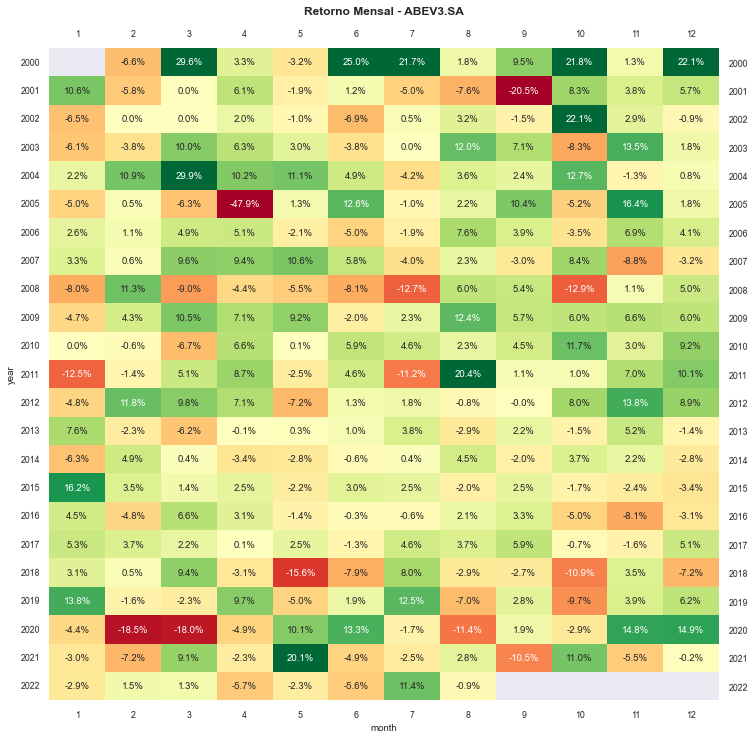

In [22]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(tab_retorno_mensal, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Retorno Mensal - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90)
ax.tick_params(axis = "x", labeltop=True)

## Calculando o retorno trimestral do ativo

In [23]:
#calculando o retorno trimestral
df_trimestral = df[filter_asset].resample('Q', kind='period').last().pct_change().dropna().to_frame()

In [24]:
df_trimestral

,abev3.sa
date,
2000Q2,0.249973
2000Q3,0.356535
2000Q4,0.506414
2001Q1,0.042553
2001Q2,0.053065
...,...
2021Q3,-0.103691
2021Q4,0.047176
2022Q1,-0.001297


In [26]:
#obtendo os dados do trimestre e ano
df_trimestral['quarter'] = df_trimestral.index.quarter
df_trimestral['year'] = df_trimestral.index.year

In [27]:
#alterando nome de uma coluna especifica
df_trimestral.rename(columns = {filter_asset:'return'}, inplace = True)

In [28]:
df_trimestral

,return,quarter,year
date,,,
2000Q2,0.249973,2,2000
2000Q3,0.356535,3,2000
2000Q4,0.506414,4,2000
2001Q1,0.042553,1,2001
2001Q2,0.053065,2,2001
...,...,...,...
2021Q3,-0.103691,3,2021
2021Q4,0.047176,4,2021
2022Q1,-0.001297,1,2022


In [29]:
#convertendo df para pivot com ano e trimestre
tab_retorno_trimestre = df_trimestral.pivot(values='return', columns='quarter', index='year')

In [30]:
tab_retorno_trimestre

quarter,1,2,3,4
year,,,,
2000,NaN,0.249973,0.356535,0.506414
2001,0.042553,0.053065,-0.302327,0.188887
2002,-0.065418,-0.060000,0.021273,0.244795
2003,-0.006275,0.052631,0.199980,0.058348
2004,0.472443,0.283424,0.016667,0.121311
2005,-0.104795,-0.406193,0.116666,0.122389
2006,0.087766,-0.022004,0.097499,0.074032
2007,0.138919,0.280260,-0.047273,-0.042807
2008,-0.068080,-0.169973,-0.024842,-0.075657


## Plotando gráfico do retorno trimestral

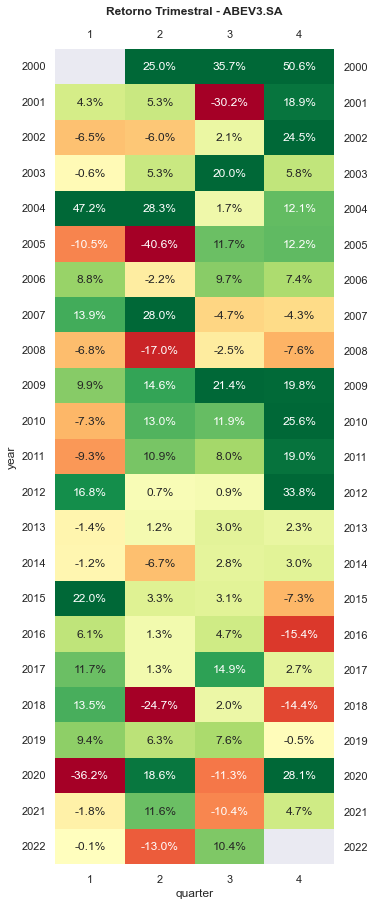

In [31]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

ax = sns.heatmap(tab_retorno_trimestre, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Retorno Trimestral - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

## Calculando o retorno anual do ativo

In [32]:
#calculando o retorno anual
df_anual = df[filter_asset].resample('A', kind='period').last().pct_change().dropna().to_frame()

In [33]:
df_anual

,abev3.sa
date,
2001,-0.089362
2002,0.116825
2003,0.328448
2004,1.154335
2005,-0.333755
2006,0.253989
2007,0.329717
2008,-0.302765
2009,0.832054


In [34]:
#alterando nome de uma coluna especifica
df_anual.rename(columns = {filter_asset:'return'}, inplace = True)

In [35]:
df_anual

,return
date,
2001,-0.089362
2002,0.116825
2003,0.328448
2004,1.154335
2005,-0.333755
2006,0.253989
2007,0.329717
2008,-0.302765
2009,0.832054


In [36]:
tab_retorno_anual = pd.DataFrame()

for year in range(df_anual.index.size, 0, -1):
    tab_retorno_anual[f"{year}Y"] = df_anual['return'].rolling(year).mean()

## Plotando gráfico de janela de retorno anual

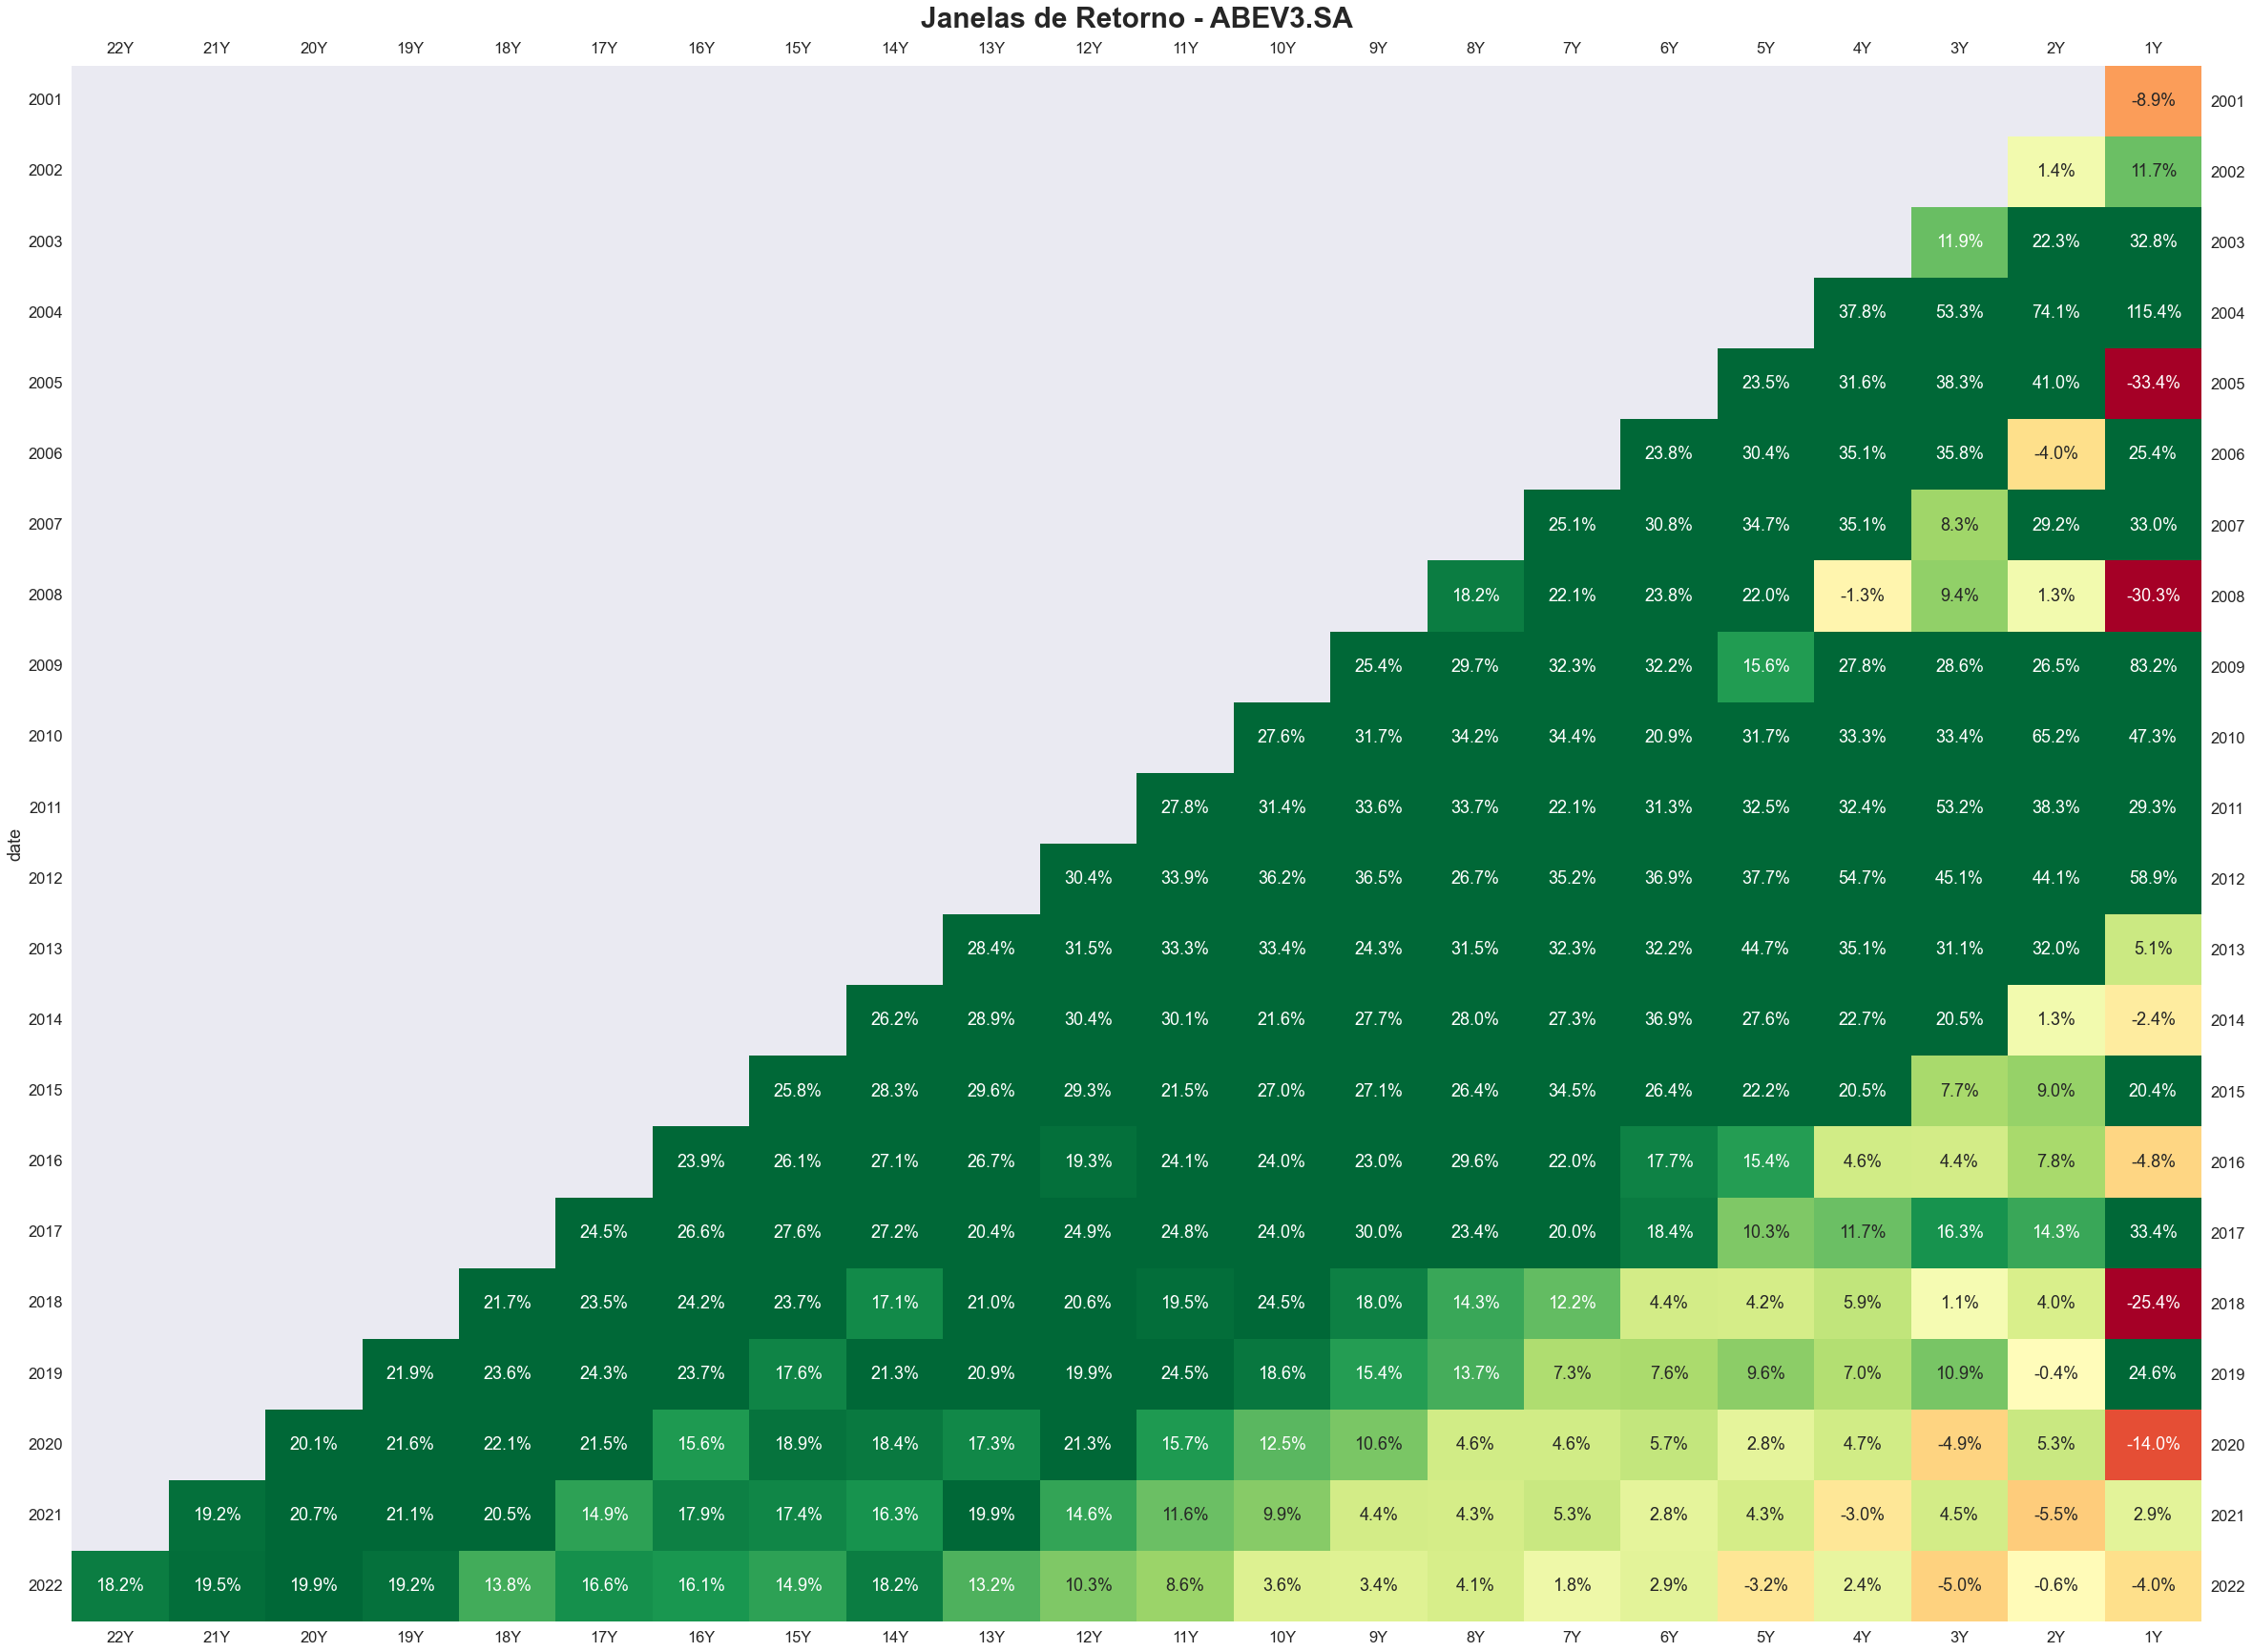

In [37]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.5)

ax = sns.heatmap(tab_retorno_anual, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Janelas de Retorno - {filter_asset.upper()}', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

In [38]:
tab_retorno_reais = pd.DataFrame()

NUMBER_BASE = 100

for year in range(df_anual.index.size, 0, -1):
    tab_retorno_reais[f"{year}Y"] = NUMBER_BASE * np.exp(year * df_anual['return'].rolling(year).mean())

In [39]:
tab_retorno_reais

,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
date,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.451470
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.784435,112.392327
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.748166,156.091714,138.881112
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,452.784786,495.109359,440.518824,317.191315
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,324.297840,354.611949,315.512596,227.181790,71.622954
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,418.071069,457.150738,406.745503,292.873162,92.333285,128.915774
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,581.359217,635.702430,565.610167,407.262126,128.396367,179.267064,139.057510
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,429.492413,469.639704,417.857442,300.874206,94.855752,132.437642,102.731914,73.877286
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,986.988004,1079.247829,960.250450,691.419041,217.981707,304.346154,236.081393,169.772487,229.803362


## Plotando gráfico de janela de retorno reais por ano

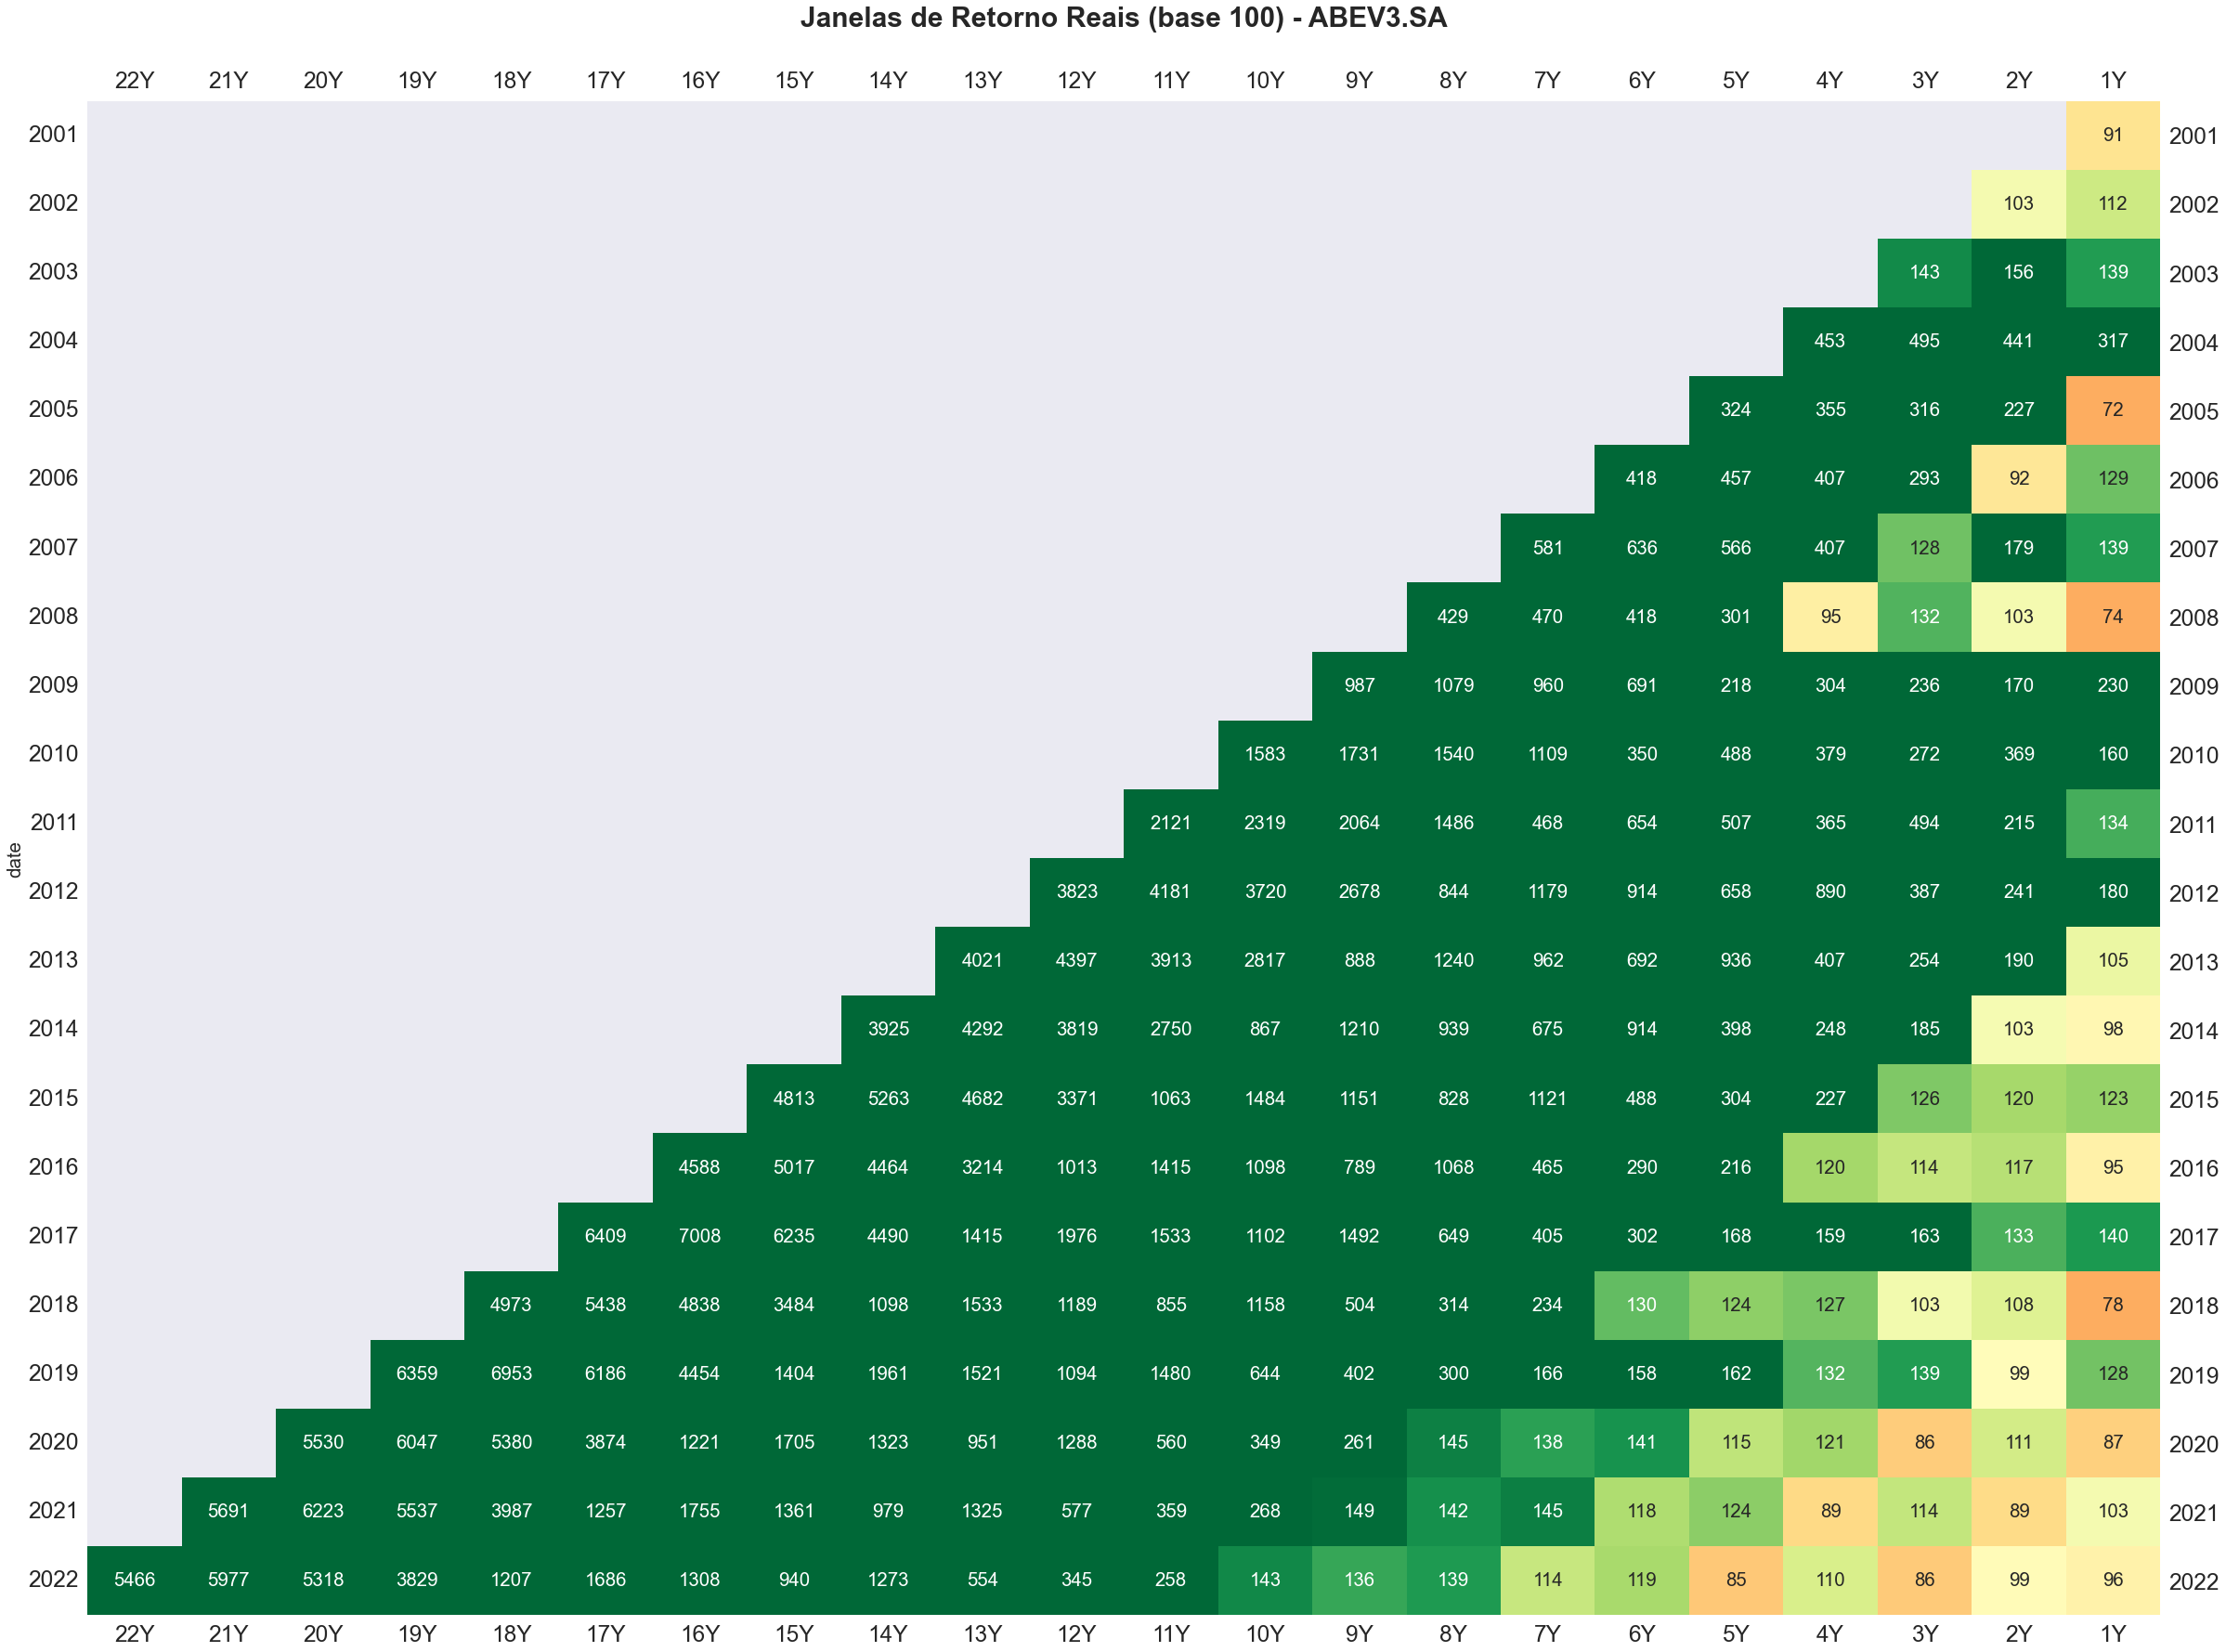

In [41]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

ax = sns.heatmap(tab_retorno_reais, 
                 annot  = True, 
                 fmt    = ".0f", 
                 cmap   = "RdYlGn", 
                 vmin   = NUMBER_BASE - 20, 
                 vmax   = NUMBER_BASE + 50, 
                 center = NUMBER_BASE, 
                 cbar=False)

ax.set_title(f'Janelas de Retorno Reais (base {NUMBER_BASE}) - {filter_asset.upper()}', pad=80, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large')
ax.tick_params(axis = "x", labeltop=True,  labelsize='large')

## Plotando gráfico da quantidade de retorno negativo x retorno negativo

In [42]:
retorno_neg = tab_retorno_reais[tab_retorno_reais < NUMBER_BASE].count()
retorno_pos = tab_retorno_reais[tab_retorno_reais >= NUMBER_BASE].count()

total_de_janelas = tab_retorno_reais.count()
pd.concat([-retorno_neg, retorno_pos], 
          axis=1, 
          keys=['retorno_negativo','retorno_positivo']).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,retorno_negativo,retorno_positivo
22Y,0,1
21Y,0,2
20Y,0,3
19Y,0,4
18Y,0,5
17Y,0,6
16Y,0,7
15Y,0,8
14Y,0,9
13Y,0,10


In [43]:
df_filter

,return,month,year
date,,,
2000-02,-0.065850,2,2000
2000-03,0.295825,3,2000
2000-04,0.032605,4,2000
2000-05,-0.031575,5,2000
2000-06,0.249973,6,2000
...,...,...,...
2022-04,-0.057143,4,2022
2022-05,-0.022727,5,2022
2022-06,-0.055673,6,2022


## Estudo de caso

### Selecionando uma ação aleatória e verificando o resultado quantitativo

In [96]:
#selecionando apenas UMA acao da carteira
RANDON_NUMBER = 1
carteira = random.sample(list(df.columns) , k=RANDON_NUMBER)
carteira

['vale3.sa']

In [97]:
carteira[0]

'vale3.sa'

In [98]:
#calculando a variacao e excluindo nas
df_asset = df[carteira].pct_change().dropna()

#alterando nome de uma coluna especifica
df_asset.rename(columns = {carteira[0]:'return'}, inplace = True)
df_asset

,return
date,
2000-01-04,-0.023810
2000-01-05,0.000000
2000-01-06,0.000000
2000-01-07,0.036585
2000-01-10,0.082353
...,...
2022-08-02,0.031874
2022-08-03,-0.038861
2022-08-04,-0.005776


In [99]:
df_media = df_asset['return'].mean()
print('Média dos retornos: {:.2f}%'.format(df_media*100))

Média dos retornos: 0.10%


In [100]:
df_desvio_padrao = df_asset['return'].std()
print('Desvio padrão dos retornos: {:.2f}%'.format(df_desvio_padrao*100))

Desvio padrão dos retornos: 2.57%


### Dado uma porcentagem "x", iremos verificar o comportamento da ação com e sem os seus principais retornos

#### No exemplo abaixo iremos utilizar 10%

In [101]:
NUMBER = 10
PERCENT_NUMBER = NUMBER/100
#verificando os piores retornos
df_asset[df_asset["return"] < -PERCENT_NUMBER]

,return
date,
2008-01-21,-0.104090
2008-09-29,-0.122078
2008-10-02,-0.105523
2008-10-15,-0.185773
2015-10-13,-0.106301
2016-03-08,-0.145051
2016-04-22,-0.111673
2019-01-28,-0.245592
2020-03-09,-0.151984


In [102]:
#verificando a probabilidade da acao cair mais que a porcentagem informada
probabilidade_teorica = norm.cdf(-PERCENT_NUMBER, loc=df_media, scale=df_desvio_padrao)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00417855%


In [103]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 23931 dias
Ou uma vez a cada 94 anos


## Plotando gráfico do retorno diário da ação

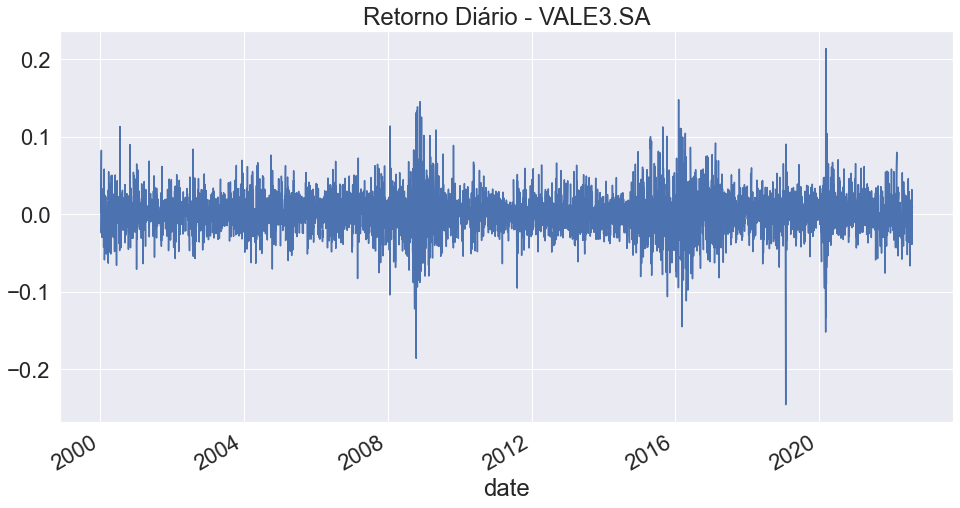

In [104]:
df_asset['return'].plot(title=f"Retorno Diário - {carteira[0].upper()}");

In [105]:
#criando um retorno teorico apenas para exemplo
df_asset['retorno_teorico'] = norm.rvs(size=df_asset['return'].size,  loc=df_media, scale=df_desvio_padrao)

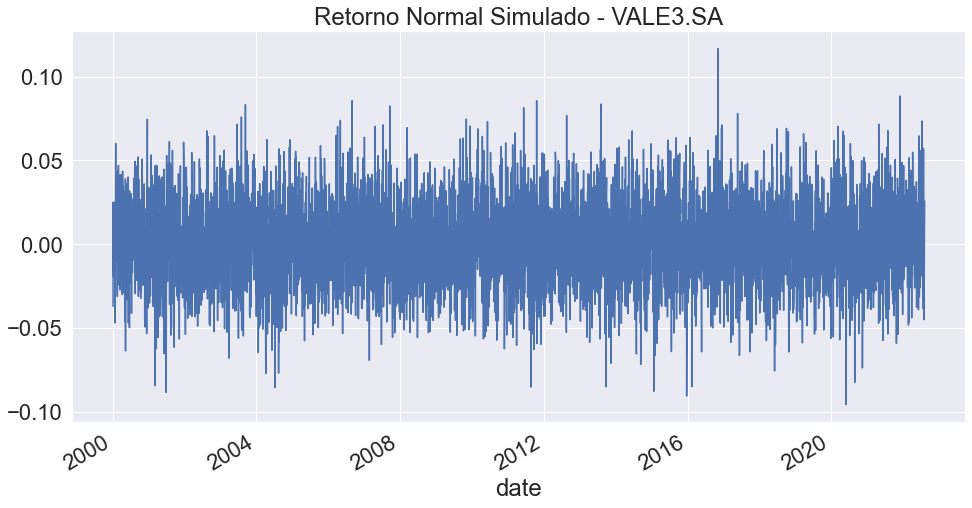

In [108]:
ax = df_asset['retorno_teorico'].plot(title=f"Retorno Normal Simulado - {carteira[0].upper()}");
#ax.set_ylim(-0.2, 0.4)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



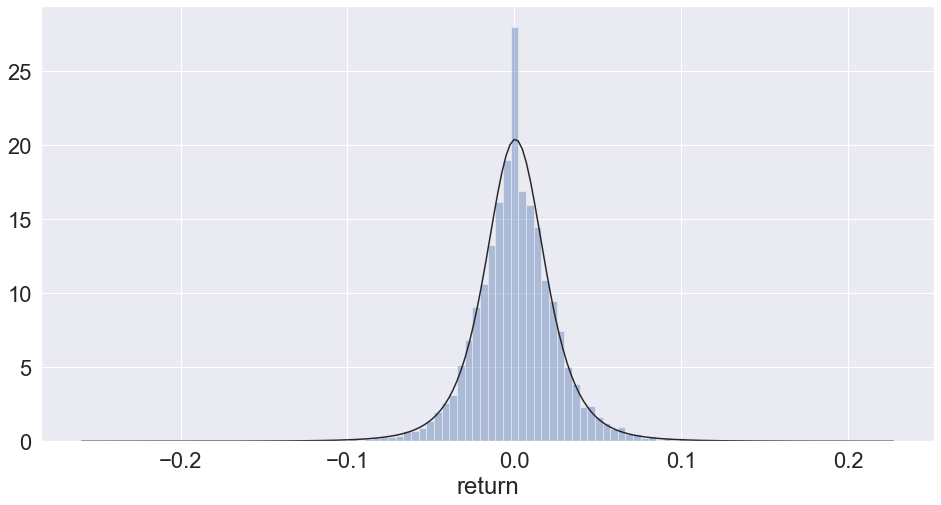

In [109]:
sns.distplot(df_asset['return'], bins=100, kde=False, fit=t);

In [110]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(df_asset['return'])
print('Distribuição T-Student\nGraus de liberdade = {:.2f} \nMédia = {:.4f} \nDesvio padrão = {:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade = 3.96 
Média = 0.0006 
Desvio padrão = 0.01836


In [111]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.14341586%


In [112]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 697 dias
Ou uma vez a cada 2 anos


In [113]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 23931 dias
Ou uma vez a cada 94 anos


In [114]:
frequencia_observada = df_asset['return'].size / df_asset[df_asset["return"] < -PERCENT_NUMBER].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 567 dias


## Estudo de caso: IBOV

In [115]:
def calcula_retorno(dataframe):
  df = dataframe.copy()  
  df['daily_return'] = df.iloc[:,0].pct_change()
  df['acum_return'] = (1 +  df['daily_return']).cumprod()
  df['acum_return'].iloc[0] = 1
  df.rename(columns={df.columns[0]: "price" }, inplace=True)
  return df

In [116]:
ibov = yf.download('^BVSP', start='2000-01-01')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [119]:
ibov = calcula_retorno(ibov)
ibov

,price,daily_return,acum_return
Date,,,
2000-01-03,16930.0,NaN,1.000000
2000-01-04,15851.0,-0.063733,0.936267
2000-01-05,16245.0,0.024856,0.959539
2000-01-06,16107.0,-0.008495,0.951388
2000-01-07,16309.0,0.012541,0.963320
...,...,...,...
2022-08-05,106472.0,0.005477,6.288955
2022-08-08,108402.0,0.018127,6.402953
2022-08-09,108651.0,0.002297,6.417661


## Plotando gráfico de preço

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ibov.index, y=ibov['price']))
#fig.update_layout(yaxis_type="log")
fig.show()

In [122]:
#verificando os melhores dias
FILTER_NUMBER = 10
ibov_melhores = ibov['daily_return'].sort_values(ascending=False)[:FILTER_NUMBER]
ibov_melhores

Date
2008-10-13    0.146560
2020-03-13    0.139082
2008-10-28    0.134262
2020-03-24    0.096885
2008-09-19    0.095657
2008-11-24    0.094013
2008-10-20    0.083574
2008-12-08    0.083119
2008-09-30    0.076323
2001-01-03    0.076110
Name: daily_return, dtype: float64

In [123]:
#os piores dias
ibov_piores = ibov['daily_return'].sort_values(ascending=True)[:FILTER_NUMBER]
ibov_piores

Date
2020-03-12   -0.147797
2020-03-16   -0.139215
2020-03-09   -0.121738
2008-10-15   -0.113931
2020-03-18   -0.103488
2008-10-22   -0.101760
2008-09-29   -0.093634
2017-05-18   -0.087992
2011-08-08   -0.080851
2008-11-12   -0.077505
Name: daily_return, dtype: float64

In [124]:
ibov_sem_melhores_dias = (1 + ibov['daily_return'].drop(ibov_melhores.index)).cumprod()
ibov_sem_piores_dias = (1 + ibov['daily_return'].drop(ibov_piores.index)).cumprod()

In [125]:
print("Retorno do IBOV desde 1995 : {:.2%}".format(ibov['acum_return'].iloc[-1]     - 1))
print("Retorno do IBOV sem os 10 piores dias : {:.2%}".format(ibov_sem_piores_dias.iloc[-1]    - 1))
print("Retorno do IBOV sem os 10 melhores dias : {:.2%}".format(ibov_sem_melhores_dias.iloc[-1] - 1))

Retorno do IBOV desde 1995 : 548.07%
Retorno do IBOV sem os 10 piores dias : 1911.37%
Retorno do IBOV sem os 10 melhores dias : 144.77%


## Plotando gráfico do IBOV sem os melhores/piores dias

In [126]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ibov.index, y=ibov['acum_return'], name='IBOV'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_melhores_dias.values, name=f'IBOV sem {FILTER_NUMBER} melhores dias'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_piores_dias.values, name=f'IBOV sem {FILTER_NUMBER} piores dias'))

#fig.update_layout(yaxis_type="log")
fig.show()

## Obtendo os dividendos do ativo

In [127]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2022-08-12'

In [128]:
data_inicial = '2000-01-01'

In [129]:
filter_asset

'abev3.sa'

In [130]:
#obtendo os dividendos da empresa
#obtendo os dividendos dos ativos atraves do vectorbt
tickers_dividends = vbt.YFData.download(filter_asset, start=data_inicial, end=data_atual).get('Dividends')

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html



In [131]:
#verificando as últimas linhas do df
tickers_dividends.tail()

Date
2022-08-05 00:00:00+00:00    0.0
2022-08-08 00:00:00+00:00    0.0
2022-08-09 00:00:00+00:00    0.0
2022-08-10 00:00:00+00:00    0.0
2022-08-11 00:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [132]:
df_ticker = pd.DataFrame(tickers_dividends)

In [133]:
df_ticker

,Dividends
Date,
2000-01-05 00:00:00+00:00,0.0
2000-01-06 00:00:00+00:00,0.0
2000-01-07 00:00:00+00:00,0.0
2000-01-10 00:00:00+00:00,0.0
2000-01-11 00:00:00+00:00,0.0
...,...
2022-08-05 00:00:00+00:00,0.0
2022-08-08 00:00:00+00:00,0.0
2022-08-09 00:00:00+00:00,0.0


In [134]:
#alterando nome de uma coluna especifica
df_ticker.rename(columns = {'Dividends':'dividendos_pagos'}, inplace = True)

In [135]:
df_ticker

,dividendos_pagos
Date,
2000-01-05 00:00:00+00:00,0.0
2000-01-06 00:00:00+00:00,0.0
2000-01-07 00:00:00+00:00,0.0
2000-01-10 00:00:00+00:00,0.0
2000-01-11 00:00:00+00:00,0.0
...,...
2022-08-05 00:00:00+00:00,0.0
2022-08-08 00:00:00+00:00,0.0
2022-08-09 00:00:00+00:00,0.0


In [136]:
df_ticker.index

DatetimeIndex(['2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               '2000-01-11 00:00:00+00:00', '2000-01-12 00:00:00+00:00',
               '2000-01-13 00:00:00+00:00', '2000-01-14 00:00:00+00:00',
               '2000-01-17 00:00:00+00:00', '2000-01-18 00:00:00+00:00',
               ...
               '2022-07-29 00:00:00+00:00', '2022-08-01 00:00:00+00:00',
               '2022-08-02 00:00:00+00:00', '2022-08-03 00:00:00+00:00',
               '2022-08-04 00:00:00+00:00', '2022-08-05 00:00:00+00:00',
               '2022-08-08 00:00:00+00:00', '2022-08-09 00:00:00+00:00',
               '2022-08-10 00:00:00+00:00', '2022-08-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5680, freq=None)

In [137]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
total_dividends = df_ticker.sum()
total_dividends

dividendos_pagos    6.835001
dtype: float64

In [138]:
df_ticker['month'] = df_ticker.index.month
df_ticker['quarter'] = df_ticker.index.quarter
df_ticker['year'] = df_ticker.index.year

In [139]:
df_ticker

,dividendos_pagos,month,quarter,year
Date,,,,
2000-01-05 00:00:00+00:00,0.0,1,1,2000
2000-01-06 00:00:00+00:00,0.0,1,1,2000
2000-01-07 00:00:00+00:00,0.0,1,1,2000
2000-01-10 00:00:00+00:00,0.0,1,1,2000
2000-01-11 00:00:00+00:00,0.0,1,1,2000
...,...,...,...,...
2022-08-05 00:00:00+00:00,0.0,8,3,2022
2022-08-08 00:00:00+00:00,0.0,8,3,2022
2022-08-09 00:00:00+00:00,0.0,8,3,2022


In [140]:
#convertendo df para ano e mes
df_dividendo_mensal = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns='month', aggfunc='sum')
df_dividendo_mensal

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2001,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2002,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2005,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2006,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
2007,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.016302
2008,0.000000,0.000000,0.000000,0.013585,0.0,0.000000,0.046348,0.0,0.037558,0.000000,0.00,0.000000


## Plotando gráfico da soma dos dividendos mensal

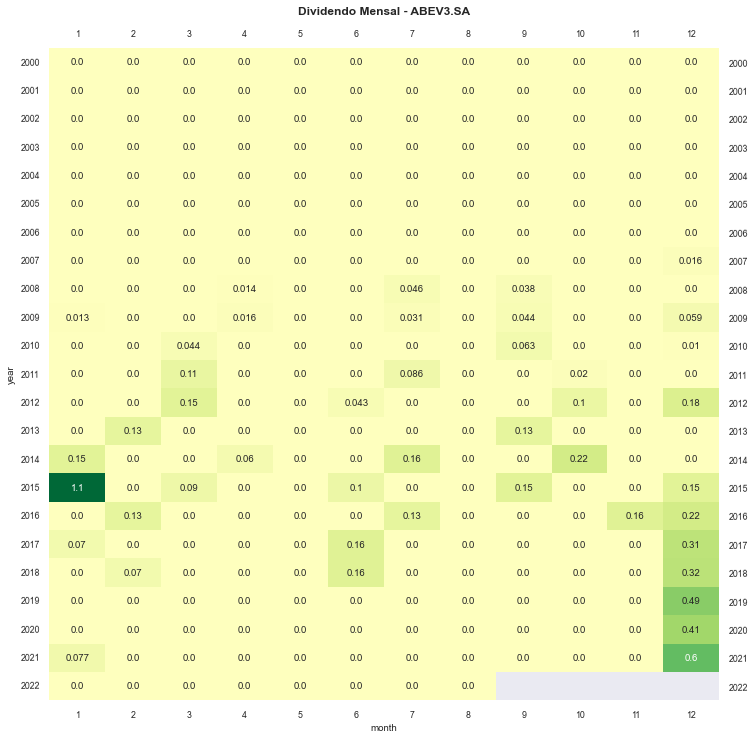

In [142]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(df_dividendo_mensal, 
                 annot  = True, 
                 fmt    = ".2", 
                 cmap   = "RdYlGn", 
                 vmin   = 0, 
                 vmax   = 1, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Dividendo Mensal - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90)
ax.tick_params(axis = "x", labeltop=True)

In [143]:
#convertendo df para ano e mes
df_dividendo_trimestral = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns='quarter', aggfunc='sum')
df_dividendo_trimestral

quarter,1,2,3,4
year,,,,
2000,0.000000,0.000000,0.000000,0.000000
2001,0.000000,0.000000,0.000000,0.000000
2002,0.000000,0.000000,0.000000,0.000000
2003,0.000000,0.000000,0.000000,0.000000
2004,0.000000,0.000000,0.000000,0.000000
2005,0.000000,0.000000,0.000000,0.000000
2006,0.000000,0.000000,0.000000,0.000000
2007,0.000000,0.000000,0.000000,0.016302
2008,0.000000,0.013585,0.083906,0.000000


## Plotando gráfico da soma dos dividendos trimestral

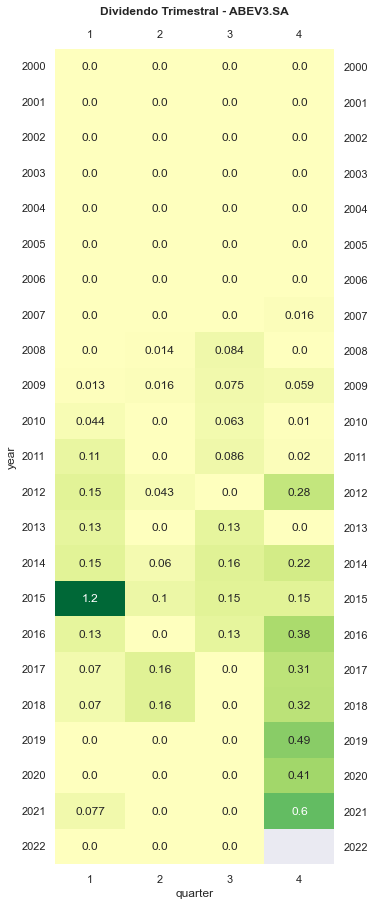

In [144]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

ax = sns.heatmap(df_dividendo_trimestral, 
                 annot  = True, 
                 fmt    = ".2", 
                 cmap   = "RdYlGn", 
                 vmin   = 0, 
                 vmax   = 1, 
                 center = 0, 
                 cbar=False)

ax.set_title(f'Dividendo Trimestral - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

In [145]:
df_dividendo_anual = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns=[], aggfunc='sum')
df_dividendo_anual

,dividendos_pagos
year,
2000,0.000000
2001,0.000000
2002,0.000000
2003,0.000000
2004,0.000000
2005,0.000000
2006,0.000000
2007,0.016302
2008,0.097491


In [146]:
tab_dividendo_anual = pd.DataFrame()

for year in range(df_dividendo_anual.index.size, 0, -1):
    tab_dividendo_anual[f"{year}Y"] = df_dividendo_anual['dividendos_pagos'].rolling(year).sum()

## Plotando gráfico da janela de dividendos por ano

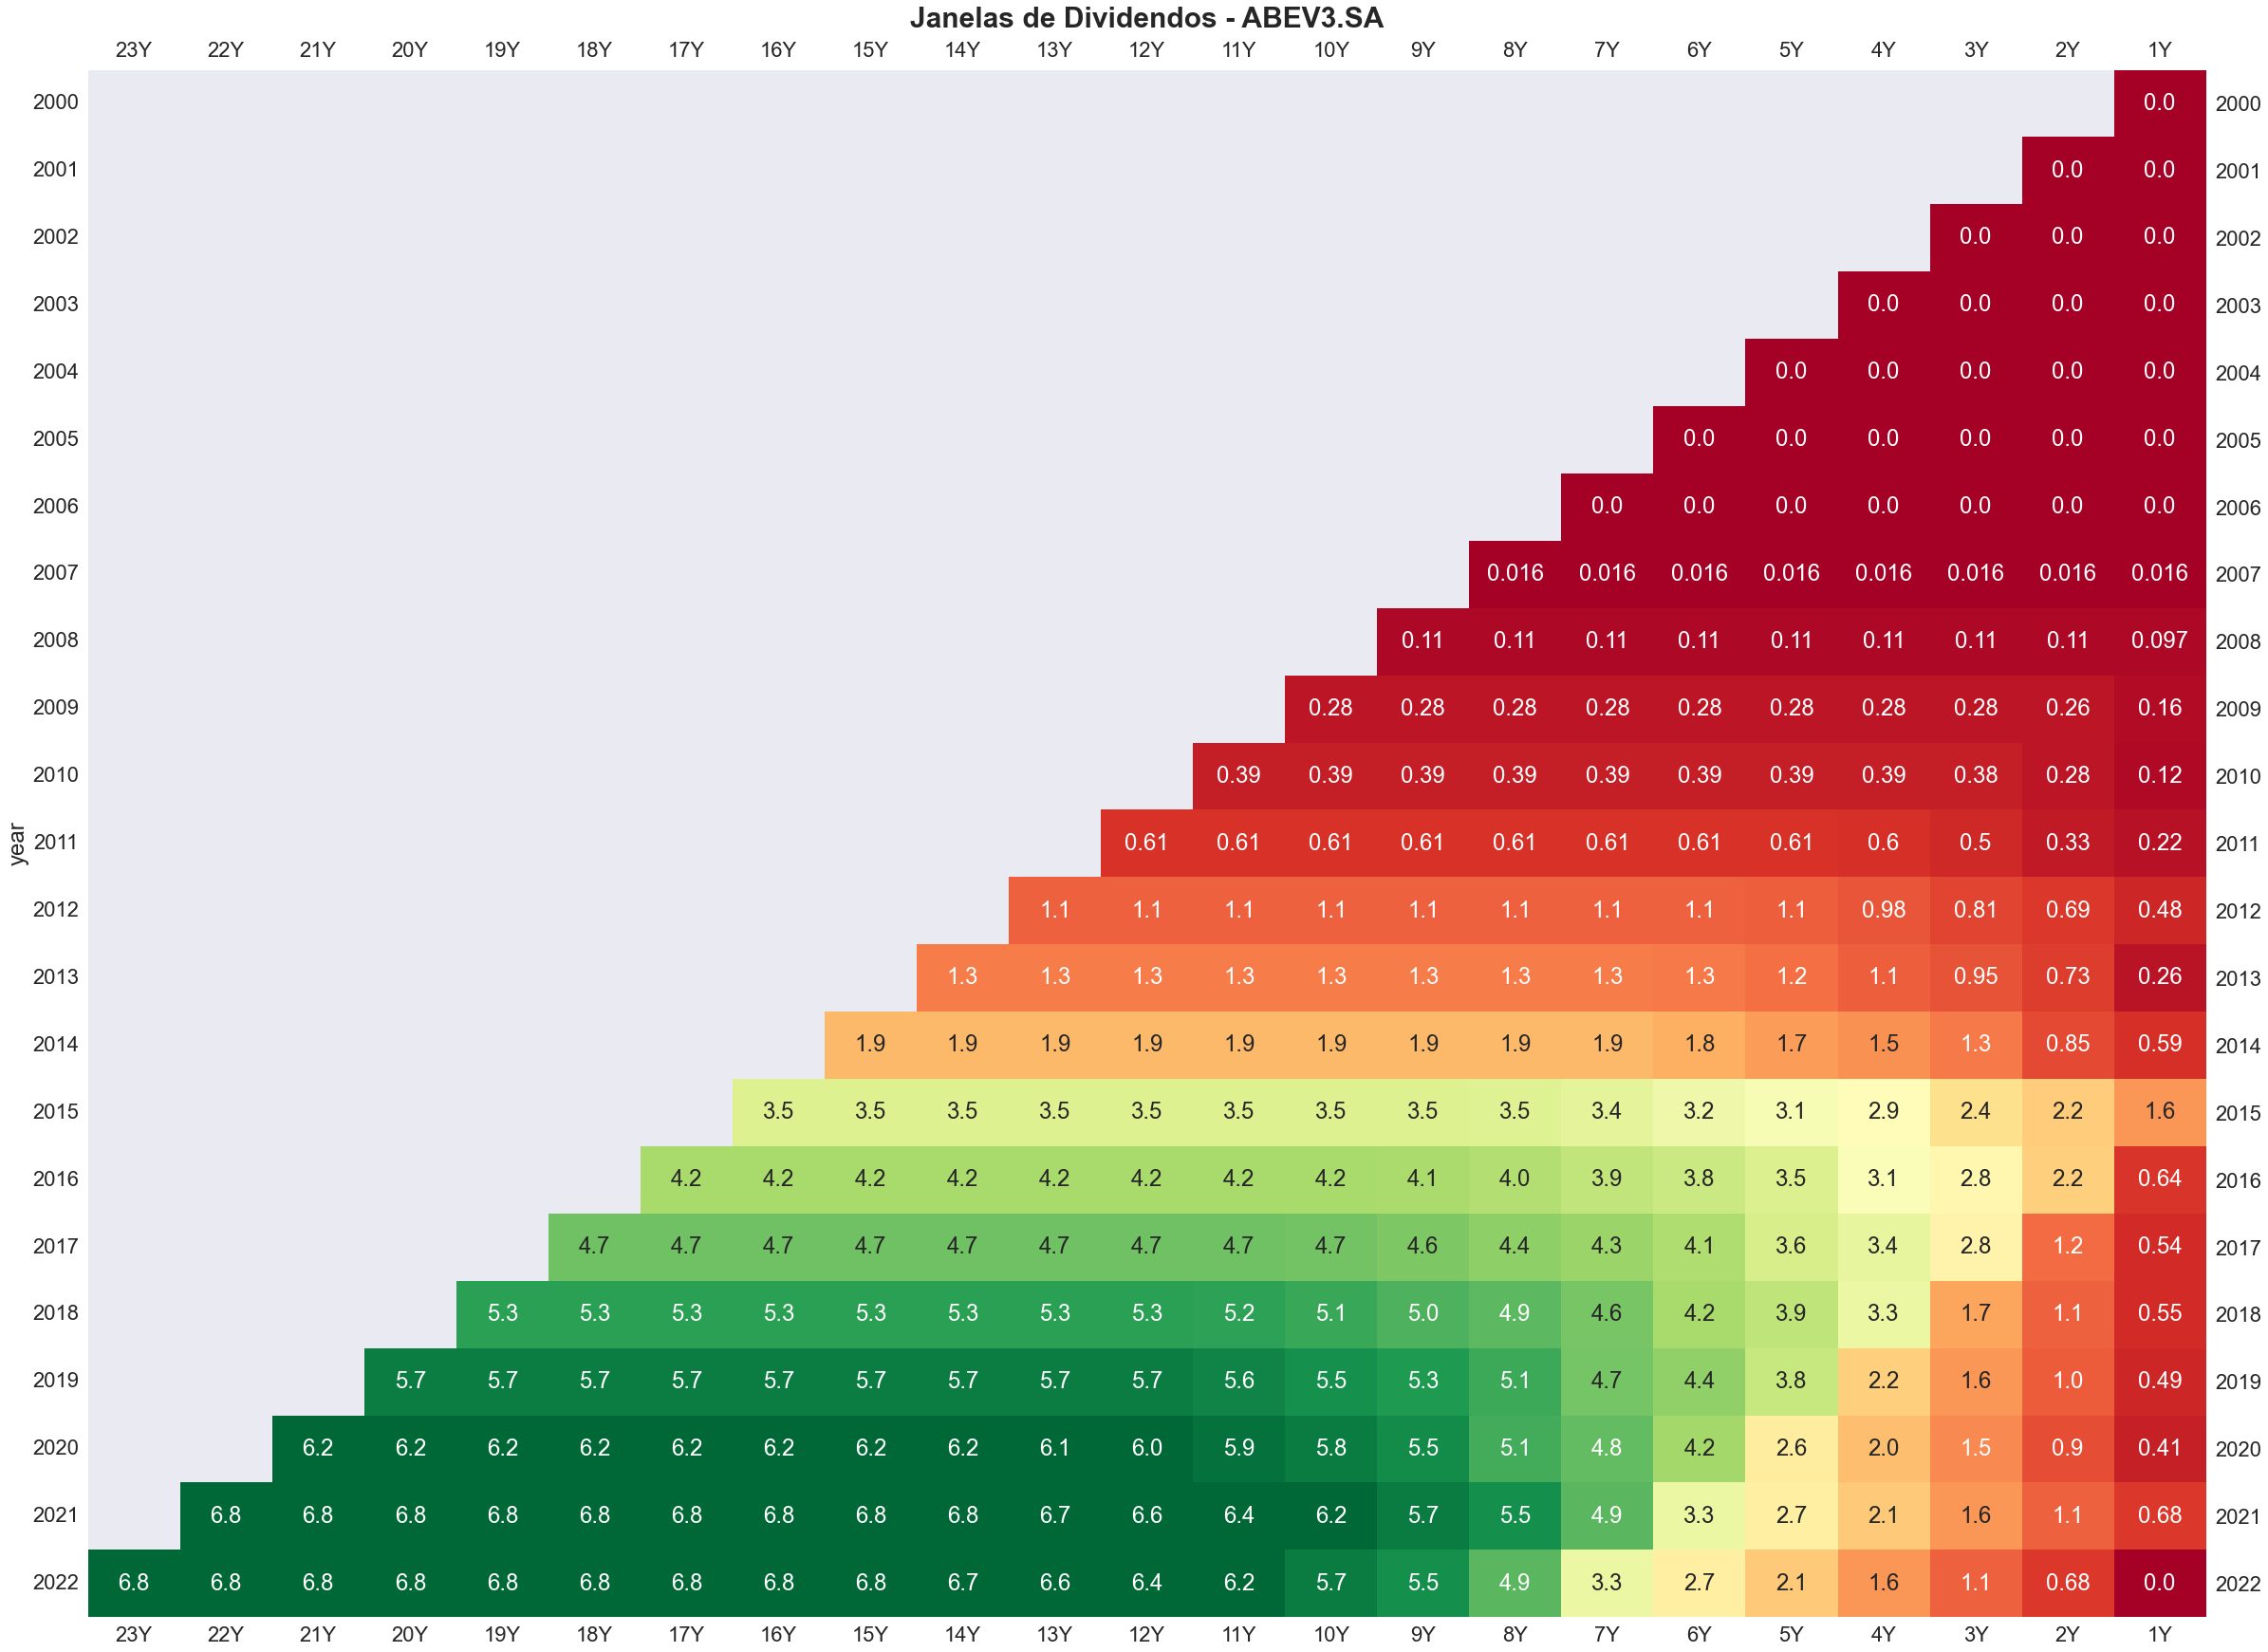

In [147]:
plt.figure(figsize=(40,30))
sns.set(font_scale=2)

ax = sns.heatmap(tab_dividendo_anual, 
                 annot  = True, 
                 fmt    = ".2", 
                 cmap   = "RdYlGn", 
                 vmin   = 0, 
                 vmax   = 6, 
                 center = 3, 
                 cbar=False)

ax.set_title(f'Janelas de Dividendos - {filter_asset.upper()}', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)